In [6]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

In [7]:
coins = pd.read_csv("coins.csv")
coins.tail(10)

,reflectance,weight,denomination
169,26.913923,5.611840,2
170,27.800820,5.595559,2
171,28.444039,6.162531,2
172,28.414699,4.792008,2
173,28.869236,5.383916,2
174,26.650728,5.420213,2
175,27.492055,6.149025,2
176,29.157397,7.035390,2
177,27.741846,5.032280,2
178,27.629866,5.395878,2


/Users/sriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='reflectance', ylabel='weight'>

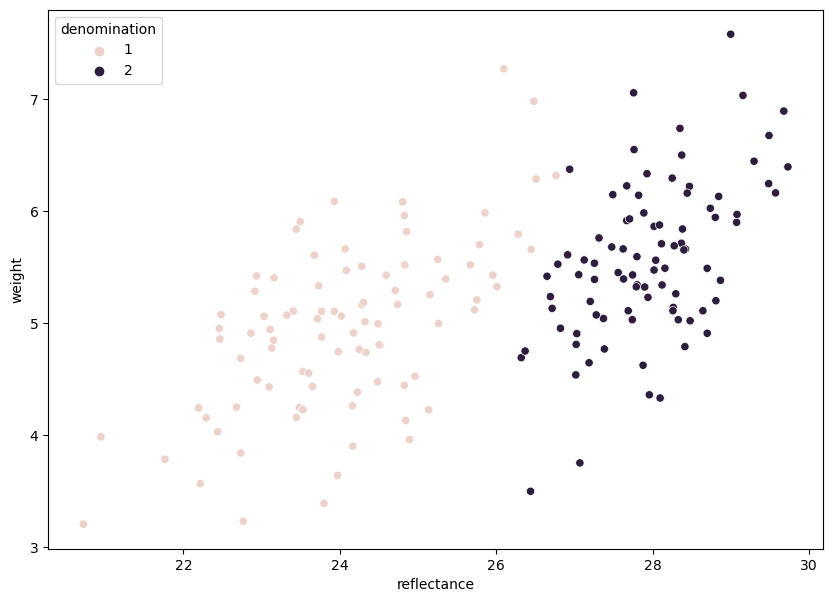

In [8]:
sns.scatterplot(x="reflectance",y="weight",data=coins, hue="denomination")

In [10]:
# test-train split
X = coins[["reflectance","weight"]].to_numpy()
y = coins[["denomination"]].to_numpy() - 1  #substract one to make denomination set 0-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
## Initiate classifier and train it using the X_train data and the y_train labels

## make sure you instantiate your classifier and name it model

num_classes = len(np.unique(y_train))
output_units = 1 if num_classes == 2 else num_classes
activation = 'sigmoid' if num_classes == 2 else 'softmax'
loss = 'binary_crossentropy' if num_classes == 2 else 'sparse_categorical_crossentropy'

model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(output_units, activation=activation)
])

model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

/Users/sriya/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
## train your model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)


In [22]:
## test the accuracy of your model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc}")


Test accuracy: 0.9444444179534912


21972/21972 ━━━━━━━━━━━━━━━━━━━━ 10s 474us/step


/Users/sriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

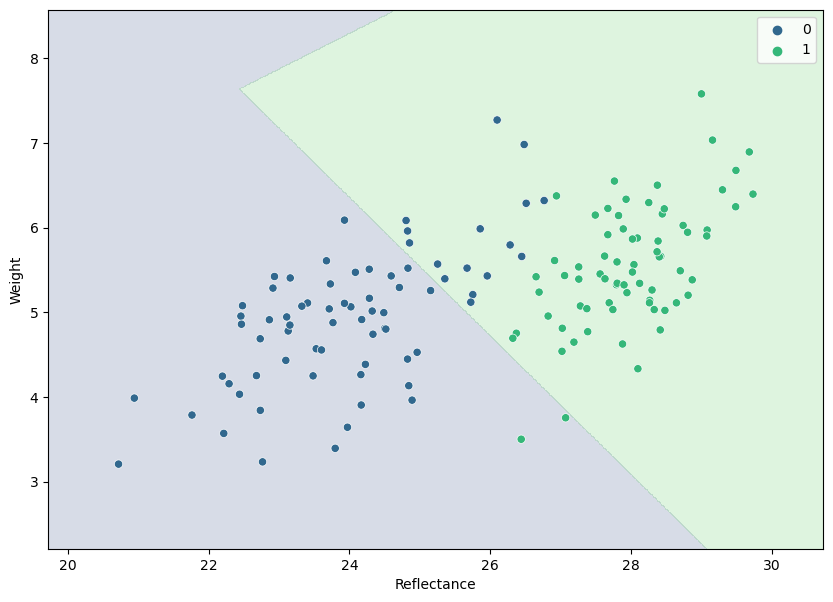

In [23]:
## plot the decision boundary of your classifier along with the scatterplot of the training data
## hint: look at the ann example
## Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z > 0.5 if num_classes == 2 else np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.ravel(), palette='viridis')
    plt.xlabel("Reflectance")
    plt.ylabel("Weight")

plot_decision_boundary(X_train, y_train.ravel(), model)
plt.show()


In [24]:
## additional stuff you want to add 

In [25]:
# dump your classifier 
from keras.models import load_model

model.save('model.h5')
loaded_model = load_model('model.h5')


In [26]:
# test saved model
from keras.models import load_model
loaded_model = load_model('model.h5')

## test the accuracy of your loaded model and compare
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Loaded model test accuracy: {loaded_test_acc}")

Loaded model test accuracy: 0.9444444179534912
